# House Price Prediction from Scratch

## Overview  
This project aims to build a **house price prediction model** from scratch using only **NumPy, Pandas, Matplotlib, and Seaborn**. The goal is to explore different regression techniques and optimization methods to understand their performance in predicting house prices.

We will experiment with **Simple and Multiple Linear Regression**, **Gradient Descent Variants**, **Polynomial Regression**, and **Regularization Techniques (Lasso & Ridge)**. The model's performance will be evaluated on both **training and test data** to analyze **overfitting and underfittiariable is **price**.

## Steps  
1. **Data Preprocessing** - Cleaning, splitting, and normalizing the data.  
2. **Exploratory Data Analysis (EDA)** - Visualizing feature distributions and correlations.  
3. **Linear Regression** - Implementing simple and multiple linear regression models.  
4. **Gradient Descent Variants** - Experimenting with different optimization techniques.  
5. **Polynomial Regression** - Investigating the impact of polynomial degrees.  
6. **Regularization** - Applying Lasso and Ridge regression to prevent overfitting.  
7. **Model Evaluation** - Analyzing results and summarizing key findings.

Throughout the project, we will visualize loss trends, experiment with different hyperparameters, and interpret the results to gain insights into the effectiveness of different approaches.




# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**

In [81]:
import numpy as np
import matplotlib, matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing Data Sets

In [82]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)

## Data Exploration

Before proceeding with preprocessing, we need to understand the dataset by:
- Displaying basic information about the data.
- Checking for missing values.
- Viewing summary statistics.
- Displaying the first few rows.

This will help us identify any necessary data cleaning steps.
 steps.

In [83]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [84]:
#Dropping the columns "Unnamed: 0', 'date' and  'id'
df.drop(['Unnamed: 0', 'id', 'date'],  axis = 1, inplace = True)

#Let us see the statistic of the data and confirned the columns are sucseccfully dropped
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21600 non-null  float64
 2   bathrooms      21603 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

We can see we have missing values for the columns bedrooms and bathrooms

In [86]:
print("The total number of NaNs : ", df.isnull().sum().sum())
print(f"Number of NaN in bedrooms: {df['bedrooms'].isnull().sum()}")
print(f"Number of NaN in bathrooms: {df['bathrooms'].isnull().sum()}")

The total number of NaNs :  23
Number of NaN in bedrooms: 13
Number of NaN in bathrooms: 10


Handling Missing Values

In [87]:
#Replacing the NaN with mean value of bedroom
bed_mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, bed_mean, inplace = True)

#Replacing the NaN with mean value of bathroom
bath_mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, bed_mean, inplace = True)

<ipython-input-87-334cb95aeeaf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan, bed_mean, inplace = True)
<ipython-input-87-334cb95aeeaf>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [88]:
print("The total number of NaNs : ", df.isnull().sum().sum())
print(f"Number of NaN in bedrooms: {df['bedrooms'].isnull().sum()}")
print(f"Number of NaN in bathrooms: {df['bathrooms'].isnull().sum()}")

The total number of NaNs :  0
Number of NaN in bedrooms: 0
Number of NaN in bathrooms: 0


## Exploratory Data Analysis: Correlation Heatmap

To understand the relationships between different features, we will compute and visualize the **correlation matrix** using a heatmap.  

- Correlation values range from **-1 to 1**:  
  - **1**: Strong positive correlation (as one feature increases, the other increases).  
  - **0**: No correlation.  
  - **-1**: Strong negative correlation (as one feature increases, the other decreases).  

This helps us identify which features are strongly related to **price**, as well as potential multicollinearity issues.


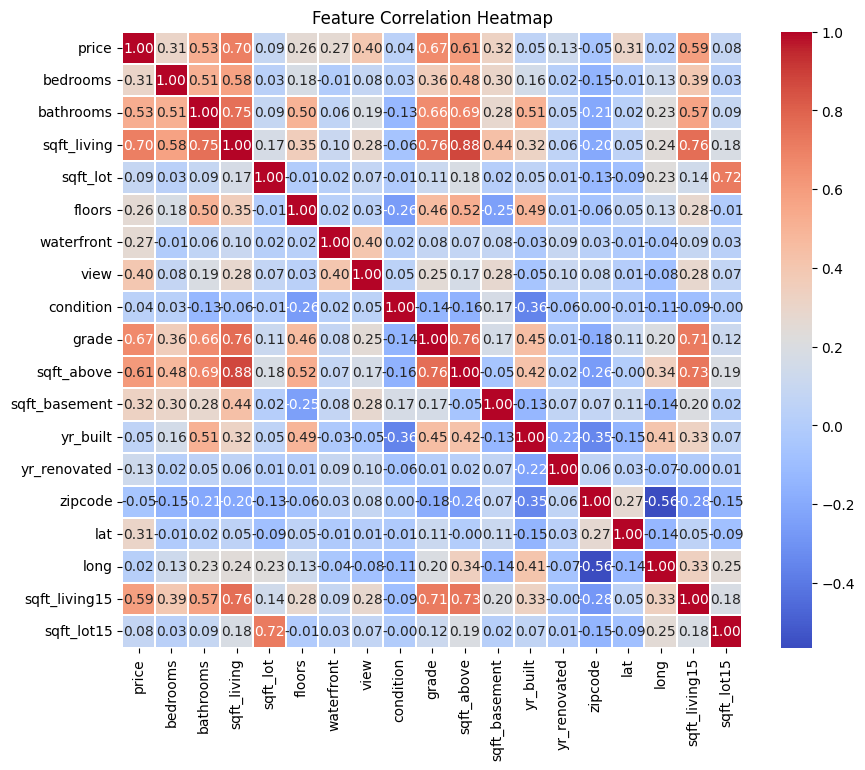

In [89]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.1)

# Add a title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()

<Axes: xlabel='sqft_living', ylabel='price'>

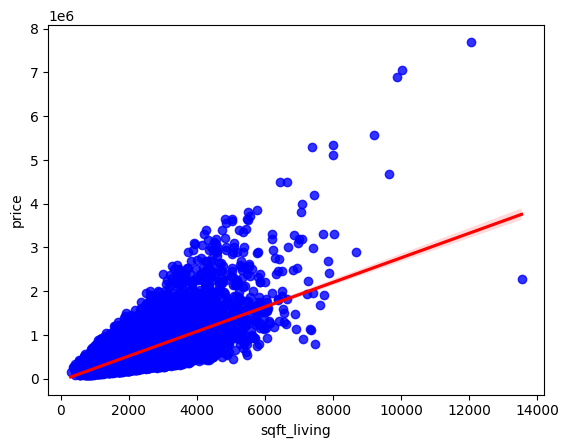

In [90]:
sns.regplot(x=df[['sqft_living']], y=df['price'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


## **Simple Linear Regression**: Using only the `sqft_living` feature


We extract `sqft_living` as our feature \(x\) and `price` as our target \(y\).


In [91]:

X = df[['sqft_living']].values  # Selecting only 'sqft_living' as feature
y = df["price"].values  # Target variable


## Splitting the Data

Before training our model, we need to split our dataset into **training** and **test** sets.  
We randomly shuffle the data and allocate a proportion (e.g., 80%) for training and the remaining (e.g., 20%) for testing.  

This ensures that we can evaluate the model on unseen data and measure its generalization performance.  


In [92]:
def split_data(X, y, test_size=0.2, random_seed=42):

    m = len(X)
    test_set_size = int(test_size * m)

    # Split the data
    X_train = X[test_set_size:]
    X_test = X[:test_set_size]
    y_train = y[test_set_size:]
    y_test = y[:test_set_size]

    return X_train, X_test, y_train, y_test

## Feature Scaling (Z-score Normalization)

Since features can have different ranges, we scale them using **Z-score normalization**:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

where:  
- \( μ \) is the mean of the feature  
- \( \sigma \) is the standard deviation  

This ensures that our gradient descent algorithm converges faster.


In [93]:
def scale_features(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1  # Avoid division by zero for constant features

    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std

    return X_train_scaled, X_test_scaled, mean, std

## Cost Function (Mean Squared Error)

The **Mean Squared Error (MSE)** is used to measure the model's performance:

$$
J(W, b) = \frac{1}{2m} \sum_{i=1}^{m} (W X_i + b - y_i)^2
$$

where:
- \( m \) is the number of training examples
- \( W \) is the weight parameter
- \( b \) is the bias term
- \( X_i \) is the input feature
- \( y_i \) is the true output

The factor \( \frac{1}{2} \) makes the gradient descent derivation simpler.


In [94]:
def compute_cost(X, y, W, b):
    m = len(y)
    predictions = X.dot(W) + b
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost


## R² Score (Coefficient of Determination)

The **R² score** measures how well the model explains the variance in the target variable:

$$
R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
$$

where:
- \( y \) is the true value
- \( \hat{y} \) is the predicted value
- \( \bar{y} \) is the mean of \( y \)


In [95]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


## Gradient Descent Algorithm

We update \( W \) and \( b \) iteratively using:

$$
w := w - \alpha \frac{1}{m} \sum_{i=1}^{m} ((w x_i+ b) - y) x_i
$$

$$
b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} ((w x_i + b) - y)
$$

where:
- $( \alpha )$ is the learning rate
- \( m \) is the number of training examples
- The gradients represent the direction of the steepest descent.


In [96]:
def gradient_descent(X, y, W, b, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        predictions = X.dot(W) + b
        error = predictions - y

        dW = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)

        W -= learning_rate * dW
        b -= learning_rate * db

        cost = compute_cost(X, y, W, b)
        cost_history.append(cost)

    return W, b, cost_history


## Visualizing Gradient Descent for Different Learning Rates

We will train our model using different learning rates and visualize:  
- **MSE** vs **Iterations**
- **R² Score** vs **Iterations**

This helps us understand the effect of learning rates on convergence.


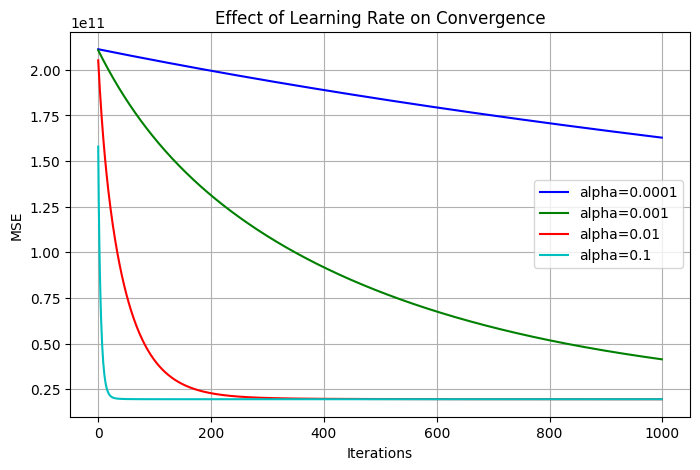

In [97]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs = 1000
colors = ['b', 'g', 'r', 'c']

plt.figure(figsize=(8, 5))

for i, lr in enumerate(learning_rates):
    W, b = np.zeros((X_train_scaled.shape[1], )), 0
    W, b, cost_history = gradient_descent(X_train_scaled, y_train, W, b, lr, epochs)

    plt.plot(range(epochs), cost_history, color=colors[i], label=f"alpha={lr}")

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Effect of Learning Rate on Convergence")
plt.legend()
plt.grid()
plt.show()


## Multiple Linear Regression

In multiple linear regression, we model the target variable \( y \) as a linear function of multiple input features:

$$
y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$$

where:
- $( x_1, x_2, \dots, x_n )$ are the input features,
- $( w_1, w_2, \dots, w_n )$ are the weights (coefficients),
- \( b \) is the bias term.

We optimize $w$ and $b$ using **gradient descent** by minimizing the Mean Squared Error (MSE):

$$
J(W, b) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

where $( \hat{y}_i \$ is the predicted value.


In [98]:
X = df.drop("price", axis=1).values
y = df["price"].values

Training Cost: 19580373870.2551
Testing Cost: 23014566731.2312
Training R^2: 0.7001
Testing R^2: 0.6962


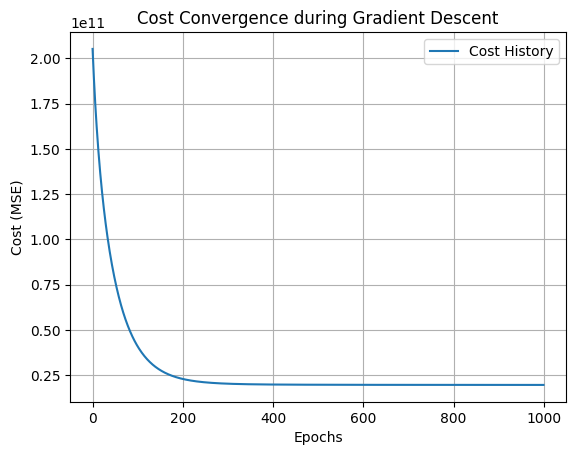

In [99]:
# Split the data using the previously defined function
X_train, X_test, y_train, y_test = split_data(X, y)

# Scale the features
X_train_scaled, X_test_scaled, mean, std = scale_features(X_train, X_test)

# Initialize W and b for multiple linear regression
W = np.random.randn(X_train_scaled.shape[1])
b = 0

# Train the model using gradient descent
learning_rate = 0.01
epochs = 1000
W, b, cost_history = gradient_descent(X_train_scaled, y_train, W, b, learning_rate, epochs)

# Evaluate the model using the cost function and R^2 score
train_predictions = X_train_scaled.dot(W) + b
test_predictions = X_test_scaled.dot(W) + b

train_cost = compute_cost(X_train_scaled, y_train, W, b)
test_cost = compute_cost(X_test_scaled, y_test, W, b)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training Cost: {train_cost:.4f}")
print(f"Testing Cost: {test_cost:.4f}")
print(f"Training R^2: {train_r2:.4f}")
print(f"Testing R^2: {test_r2:.4f}")

# Plot the cost history over the epochs
plt.plot(range(epochs), cost_history, label="Cost History")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost Convergence during Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


### Polynomial Regression

Polynomial regression extends multiple linear regression by fitting a curve to the data. The relationship between the features and target is represented as a polynomial, rather than a straight line.

For polynomial regression of degree \(d\), we extend the feature matrix \(X\) by adding powers of each feature, so the model becomes:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_d x^d
$$

Where \( \beta_0 \) is the intercept and \( \beta_1, \beta_2, \dots, \beta_d \) are the coefficients.

We will follow these steps:
1. Extend the features with polynomial terms.
2. Apply gradient descent to optimize the model.
3. Evaluate the model using cost and \( R^2 \) score.

### Steps:
- Extend the feature matrix to include polynomial features up to the desired degree.
- Scale the features for better convergence.
- Apply gradient descent to optimize the weights and bias.
- Evaluate the model's performance.


In [100]:
def create_polynomial_features(X, degree):
    poly_features = X.copy()
    for d in range(2, degree + 1):
        poly_features = np.column_stack((poly_features, X**d))
    return poly_features

Training model with polynomial degree 1...
Train cost for degree 1: 19573180834.0188
Test cost for degree 1: 23002789364.5986
Train R^2 for degree 1: 0.7002
Test R^2 for degree 1: 0.6963
------------------------------------------

Training model with polynomial degree 2...
Train cost for degree 2: 17199458847.7851
Test cost for degree 2: 19454099614.9466
Train R^2 for degree 2: 0.7366
Test R^2 for degree 2: 0.7432
------------------------------------------

Training model with polynomial degree 3...
Train cost for degree 3: 16891854173.9984
Test cost for degree 3: 20029711290.3174
Train R^2 for degree 3: 0.7413
Test R^2 for degree 3: 0.7356
------------------------------------------

Training model with polynomial degree 4...
Train cost for degree 4: 16628895437.5243
Test cost for degree 4: 22080783968.0265
Train R^2 for degree 4: 0.7453
Test R^2 for degree 4: 0.7085
------------------------------------------

Training model with polynomial degree 5...
Train cost for degree 5: 16477629

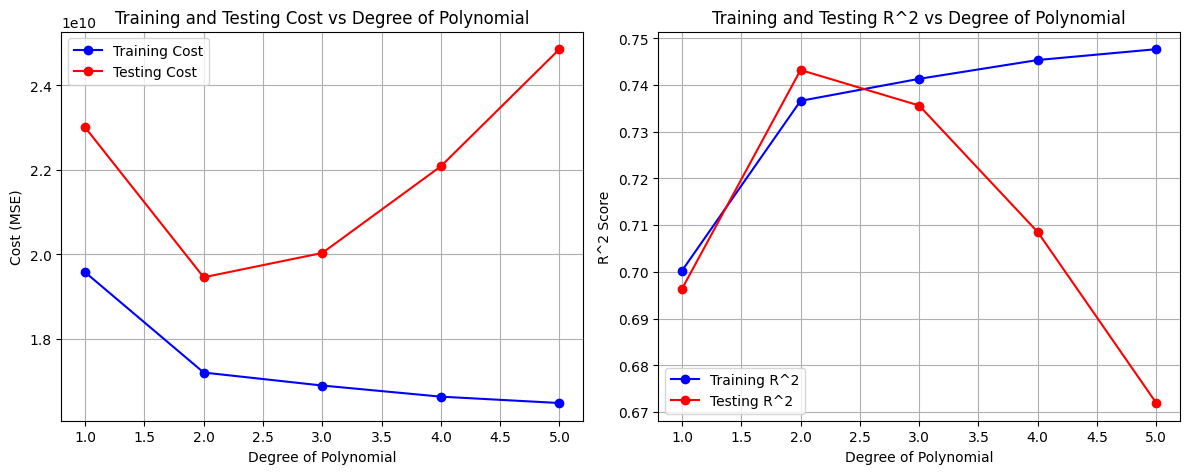

In [101]:
def evaluate_model(X, y, degrees=[1, 2, 3, 4], learning_rate=0.01, epochs=1000, random_seed=None):
    training_costs = []
    testing_costs = []
    training_r2 = []
    testing_r2 = []

    for degree in degrees:
        print(f"Training model with polynomial degree {degree}...")

        # Create polynomial features
        X_poly = create_polynomial_features(X, degree)

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = split_data(X_poly, y, test_size=0.2, random_seed=42)

        # Scale features
        X_train_scaled, X_test_scaled, mean, std = scale_features(X_train, X_test)

        # Initialize weights and bias
        W = np.zeros(X_train_scaled.shape[1])  # Initialize weights as zeros
        b = 0  # Initialize bias as zero

        # Train the model
        W, b, cost_history = gradient_descent(X_train_scaled, y_train, W, b, learning_rate, epochs)

        # Compute predictions
        y_train_pred = X_train_scaled.dot(W) + b  # Predict on training set
        y_test_pred = X_test_scaled.dot(W) + b  # Predict on test set

        # Compute costs
        train_cost = compute_cost(X_train_scaled, y_train, W, b)
        test_cost = compute_cost(X_test_scaled, y_test, W, b)

        # Compute R^2 scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        print(f"Train cost for degree {degree}: {train_cost:.4f}")
        print(f"Test cost for degree {degree}: {test_cost:.4f}")
        print(f"Train R^2 for degree {degree}: {train_r2:.4f}")
        print(f"Test R^2 for degree {degree}: {test_r2:.4f}")
        print("------------------------------------------\n")

        # Append results to lists
        training_costs.append(train_cost)
        testing_costs.append(test_cost)
        training_r2.append(train_r2)
        testing_r2.append(test_r2)

    # Plot training and testing cost curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(degrees, training_costs, marker='o', color='b', label='Training Cost')
    plt.plot(degrees, testing_costs, marker='o', color='r', label='Testing Cost')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Cost (MSE)')
    plt.title('Training and Testing Cost vs Degree of Polynomial')
    plt.legend()
    plt.grid(True)

    # Plot training and testing R^2 curves
    plt.subplot(1, 2, 2)
    plt.plot(degrees, training_r2, marker='o', color='b', label='Training R^2')
    plt.plot(degrees, testing_r2, marker='o', color='r', label='Testing R^2')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('R^2 Score')
    plt.title('Training and Testing R^2 vs Degree of Polynomial')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

evaluate_model(X, y, degrees=[1, 2, 3, 4, 5], learning_rate=0.01, epochs=10000)


# Model Performance Analysis

For degree 1, the model underfits as both train and test errors are high, indicating high bias. Increasing the polynomial degree to 2 improves the performance, reducing error and achieving a better bias-variance trade-off. Degree 3 performs similarly but does not significantly improve generalization. Degree 4 starts overfitting, as the test error increases while train error decreases. Degree 5 shows severe overfitting, with a high test error and a slight train error reduction, capturing noise instead of the true pattern. Proper regularization helps mitigate overfitting while maintaining good generalization.

The best fit is degree of 2.

## **Regularization**

### L1 Regularization (Lasso Regression)
L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator), adds the sum of the absolute values of the coefficients to the cost function:

$$
J(W, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_W(x_i) - y_i)^2 + \lambda \sum_{j=1}^{n} |W_j|
$$

where:
- \( h_W(x) = XW + b \) is the hypothesis function,
- \( \lambda \) is the regularization parameter that controls the strength of the penalty,
- \( |W_j| \) is the absolute value of the weight coefficients.

#### Effects:
- Encourages sparsity, meaning some weights become exactly zero, leading to feature selection.
- Useful when we suspect only a few features are important.
- May lead to discontinuities in gradient updates, making optimization more challenging.

### L2 Regularization (Ridge Regression)
L2 regularization, also known as Ridge regression, adds the sum of the squared values of the coefficients to the cost function:

$$
J(W, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_W(x_i) - y_i)^2 + \lambda \sum_{j=1}^{n} W_j^2
$$

#### Effects:
- Penalizes large coefficients, preventing overfitting.
- Unlike Lasso, does not force coefficients to become zero but shrinks them toward zero.
- More stable for problems with collinearity.

### Comparison
- **Lasso**: Feature selection, sparsity, zero coefficients.
- **Ridge**: Shrinks coefficients but does not force them to zero.
- **No Regularization**: Higher risk of overfitting with complex models.

### Implementation in Python
The following code trains polynomial regression with degree 2 and applies L1 (Lasso), L2 (Ridge), and no regularization for different values of \(\lambda\). The x-axis represents different \(\lambda\) values, and the y-axis shows both MSE and \( R^2 \).


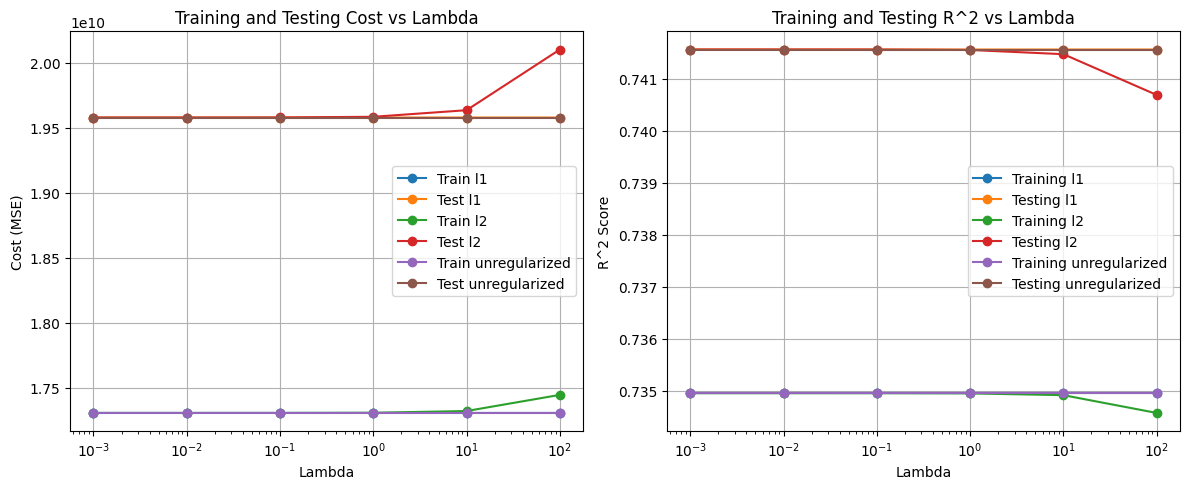

In [103]:

def compute_cost_regularized(X, y, W, b, lambda_, reg_type="l2"):
    m = len(y)
    predictions = X.dot(W) + b
    cost = np.sum((predictions - y) ** 2) / (2 * m)

    if reg_type == "l2":
        cost += (lambda_ / (2 * m)) * np.sum(W ** 2)
    elif reg_type == "l1":
        cost += (lambda_ / m) * np.sum(np.abs(W))

    return cost

def gradient_descent_regularized(X, y, W, b, learning_rate, epochs, lambda_, reg_type="l2"):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        predictions = X.dot(W) + b
        error = predictions - y

        dW = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)

        if reg_type == "l2":
            dW += (lambda_ / m) * W
        elif reg_type == "l1":
            dW += (lambda_ / m) * np.sign(W)

        W -= learning_rate * dW
        b -= learning_rate * db

        cost = compute_cost_regularized(X, y, W, b, lambda_, reg_type)
        cost_history.append(cost)

    return W, b, cost_history

def evaluate_regularization(X, y, lambdas, learning_rate=0.01, epochs=1000):
    training_costs = {"l1": [], "l2": [], "unregularized": []}
    testing_costs = {"l1": [], "l2": [], "unregularized": []}
    training_r2 = {"l1": [], "l2": [], "unregularized": []}
    testing_r2 = {"l1": [], "l2": [], "unregularized": []}

    X_poly = create_polynomial_features(X, degree=2)
    X_train, X_test, y_train, y_test = split_data(X_poly, y, test_size=0.2)
    X_train_scaled, X_test_scaled, mean, std = scale_features(X_train, X_test)

    for reg_type in ["l1", "l2", "unregularized"]:
        for lambda_ in lambdas:
            W = np.zeros(X_train_scaled.shape[1])
            b = 0

            if reg_type == "unregularized":
                lambda_ = 0

            W, b, _ = gradient_descent_regularized(X_train_scaled, y_train, W, b, learning_rate, epochs, lambda_, reg_type)

            y_train_pred = X_train_scaled.dot(W) + b
            y_test_pred = X_test_scaled.dot(W) + b

            train_cost = compute_cost_regularized(X_train_scaled, y_train, W, b, lambda_, reg_type)
            test_cost = compute_cost_regularized(X_test_scaled, y_test, W, b, lambda_, reg_type)

            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)

            training_costs[reg_type].append(train_cost)
            testing_costs[reg_type].append(test_cost)
            training_r2[reg_type].append(train_r2)
            testing_r2[reg_type].append(test_r2)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for reg_type in ["l1", "l2", "unregularized"]:
        plt.plot(lambdas, training_costs[reg_type], marker='o', label=f'Train {reg_type}')
        plt.plot(lambdas, testing_costs[reg_type], marker='o', label=f'Test {reg_type}')
    plt.xlabel('Lambda')
    plt.ylabel('Cost (MSE)')
    plt.title('Training and Testing Cost vs Lambda')
    plt.legend()
    plt.xscale("log")
    plt.xscale("log")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    for reg_type in ["l1", "l2", "unregularized"]:
        plt.plot(lambdas, training_r2[reg_type], marker='o', label=f'Training {reg_type}')
        plt.plot(lambdas, testing_r2[reg_type], marker='o', label=f'Testing {reg_type}')
    plt.xlabel('Lambda')
    plt.ylabel('R^2 Score')
    plt.title('Training and Testing R^2 vs Lambda')
    plt.legend()
    plt.xscale("log")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

evaluate_regularization(X, y, lambdas=[0.001, 0.01, 0.1, 1, 10, 100], epochs=5000)



The evaluation of the model with L1 and L2 regularization showed no improvement in performance. Therefore, the best model remains the quadratic model without regularization, as it provides the optimal balance between accuracy and complexity.